In [1]:
#libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading in dataset
df_diabetes = pd.read_csv("health care diabetes.csv")

In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Exploration

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset does not contain any missing values, but a value of zero in columns such as glucose, blood pressure,
skin thickness, Insulin and BMI would not make sense

In [5]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visually explore these variables using histograms and treat missing values

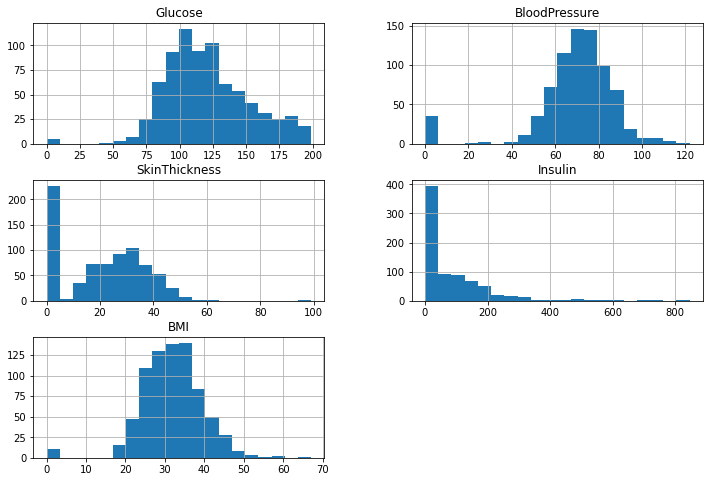

In [6]:
cols=df_diabetes.columns[1:-3]
df_diabetes[cols].hist(figsize=(12, 8), bins=20)
plt.show()

In [7]:
# viewing number of NAs:
df_diabetes[cols]=df_diabetes[cols].replace(0,np.NaN)
df_diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
# percent of NAs in column:

(df_diabetes.isna().sum()/df_diabetes.shape[0])*100


Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

handling NAs:

based on the relatively normal distribution, I will replace the NAs with the following:

Glucose- normal distribution with only five NAs - replace with average 

BloodPressure- replace with average 

Skin Thickness- High number of NAs, 30 percent. I will replace these with the mean

Insulin- High Number of NAs (48 percent), Right Skewed, meaning that mean > median due to outliers. I shall replace NAs with the median instead of the mean

BMI- averages

In [9]:
for column in cols:
    if column=="Insulin":
        df_diabetes[column]=df_diabetes[column].replace(np.NaN,df_diabetes[column].median())
    else:
         df_diabetes[column]=df_diabetes[column].replace(np.NaN,df_diabetes[column].mean())

In [10]:
df_diabetes.info() #no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


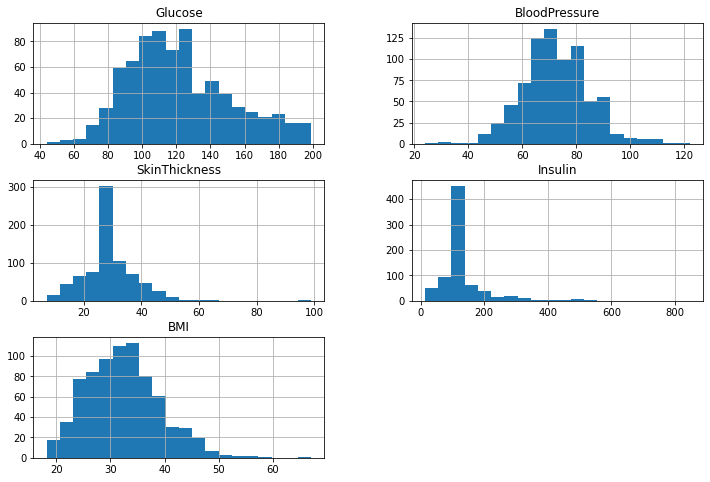

In [12]:
df_diabetes[cols].hist(figsize=(12, 8), bins=20)
plt.show()

As we can see, the Insulin column is still not very normally distributed. I will apply a log transformation to make it
more normally distributed.

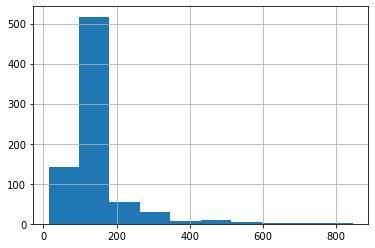

In [13]:
df_diabetes["Insulin"].hist()
plt.show()

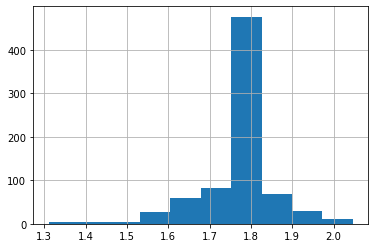

In [15]:
df_diabetes["Insulin"].apply(np.log1p)
df_diabetes["Insulin"]=df_diabetes["Insulin"].apply(np.log1p)
df_diabetes["Insulin"].hist()
plt.show()# normal distribution

#### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 